In [44]:
# ----------
# User Instructions:
# 
# Define a function, search() that returns a list
# in the form of [optimal path length, row, col]. For
# the grid shown below, your function should output
# [11, 4, 5].
#
# If there is no valid path from the start point
# to the goal, your function should return the string
# 'fail'
# ----------

# Grid format:
#   0 = Navigable space
#   1 = Occupied space


grid = [[0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 1, 1, 1, 0],
        [0, 0, 0, 0, 1, 0]]
init = [0, 0]
goal = [len(grid)-1, len(grid[0])-1]
cost = 1

delta = [[-1, 0], # go up
         [ 0,-1], # go left
         [ 1, 0], # go down
         [ 0, 1]] # go right

delta_name = ['^', '<', 'v', '>']

def search(grid,init,goal,cost):
    closed = [[0 for row in range(len(grid[0]))] for col in range(len(grid))]
    closed[init[0]][init[1]] = 1

    path = []

    x = init[0]
    y = init[1]
    g = 0

    open = [[g, x, y]]

    found = False  # flag that is set when search is complete
    resign = False # flag set if we can't find expand

    while not found and not resign:
        if len(open) == 0:
            resign = True
            return 'fail'
        else:
            open.sort()
            open.reverse()
            next = open.pop()
            x = next[1]
            y = next[2]
            g = next[0]
            
            path.append([x, y])

            if x == goal[0] and y == goal[1]:
                found = True
            else:
                for i in range(len(delta)):
                    x2 = x + delta[i][0]
                    y2 = y + delta[i][1]
                    if x2 >= 0 and x2 < len(grid) and y2 >=0 and y2 < len(grid[0]):
                        if closed[x2][y2] == 0 and grid[x2][y2] == 0:
                            g2 = g + cost
                            open.append([g2, x2, y2])
                            closed[x2][y2] = 1
    return path

In [45]:
path = search(grid,init,goal,cost)
print(path)

[[0, 0], [0, 1], [1, 0], [1, 1], [2, 0], [2, 1], [3, 0], [2, 2], [3, 1], [4, 0], [2, 3], [4, 1], [1, 3], [4, 2], [0, 3], [1, 4], [4, 3], [0, 4], [1, 5], [0, 5], [2, 5], [3, 5], [4, 5]]


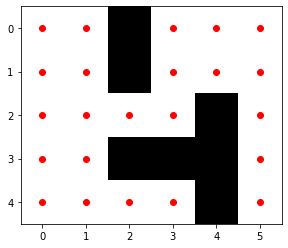

In [46]:
import matplotlib.pyplot as plt

# Visualization function
def visualize(grid, path):
    plt.imshow(grid, cmap='Greys')
    for i in range(len(path)):
        x, y = path[i]
        plt.scatter(y, x, c='r', marker='o')
    plt.show()

visualize(grid, path)
